In [21]:
import pandas as pd
from nltk import tokenize
import seaborn as sns
import matplotlib.pyplot as plt

In [55]:
data = pd.read_csv('P:/python/amazon_oneplus9r_reviews.csv')
data

,oneplus9r_reviews
0,I am writing down this after using for a cou...
1,Worst phone by one plusHeating issues :yesBa...
2,"First of all, it is hearing every time I use..."
3,I have recieved this new phone yesterday. Si...
4,Disappointed. This was my first purchase of ...
...,...
355,"Good design, better feel in hand, good camer..."
356,Switching from Samsung S series was a tough ...
357,"Battery life is as good as expected, need to..."
358,I ordered an One Plus 9R 5G and received del...


In [56]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 360 entries, 0 to 359
Data columns (total 1 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   oneplus9r_reviews  360 non-null    object
dtypes: object(1)
memory usage: 2.9+ KB


In [46]:
#data = data.drop('Unnamed: 0', axis = 1)

In [57]:
data[data.duplicated()]

,oneplus9r_reviews


In [58]:
data = [x.strip() for x in data.oneplus9r_reviews]
data = [x for x in data if x]
data

['I am writing down this after using for a couple of days. I got the carbon black one with 12GB RAM.  Overall the device is good, and honestly is the reskin of one plus 8T with lower price 😁.  I will list down the pros and cons -pros -1. With Oxygen OS 11, the overall user experience is quite smooth. You will get an update as soon as you finish setup.2. The Warp 65 fast charging is fine, takes around 35 mins for one full charge.3. The screen to body ratio is good.4. The matt finish on the back side is awesome.Cons -1. Battery drains a little fast, not sure if some future updates will fix it.2. Rear Camera is ok, can be better.3. I would have preferred popup front camera, rather than the punch hole.4. For dual apps, I would have loved to see the option for all apps. Right now it has support for few.5. support for few more 5G bands will be good to have.',
 "Worst phone by one plusHeating issues :yesBattery drain : yesPhone hang or crash : twice in a dayPhone needs a restart daily else it

In [61]:
data1 = pd.DataFrame(data, columns = ['oneplus9r_reviews'])
data1

,oneplus9r_reviews
0,I am writing down this after using for a coupl...
1,Worst phone by one plusHeating issues :yesBatt...
2,"First of all, it is hearing every time I use c..."
3,I have recieved this new phone yesterday. Sinc...
4,Disappointed. This was my first purchase of on...
...,...
355,"Good design, better feel in hand, good camera ..."
356,Switching from Samsung S series was a tough de...
357,"Battery life is as good as expected, need to c..."
358,I ordered an One Plus 9R 5G and received deliv...


### Emotion Mining

In [49]:
afinn = pd.read_csv('P:/python/Afinn.csv', sep=',', encoding='latin-1')
affinity_scores = afinn.set_index('word')['value'].to_dict()
affinity_scores

{'abandon': -2,
 'abandoned': -2,
 'abandons': -2,
 'abducted': -2,
 'abduction': -2,
 'abductions': -2,
 'abhor': -3,
 'abhorred': -3,
 'abhorrent': -3,
 'abhors': -3,
 'abilities': 2,
 'ability': 2,
 'aboard': 1,
 'absentee': -1,
 'absentees': -1,
 'absolve': 2,
 'absolved': 2,
 'absolves': 2,
 'absolving': 2,
 'absorbed': 1,
 'abuse': -3,
 'abused': -3,
 'abuses': -3,
 'abusive': -3,
 'accept': 1,
 'accepted': 1,
 'accepting': 1,
 'accepts': 1,
 'accident': -2,
 'accidental': -2,
 'accidentally': -2,
 'accidents': -2,
 'accomplish': 2,
 'accomplished': 2,
 'accomplishes': 2,
 'accusation': -2,
 'accusations': -2,
 'accuse': -2,
 'accused': -2,
 'accuses': -2,
 'accusing': -2,
 'ache': -2,
 'achievable': 1,
 'aching': -2,
 'acquit': 2,
 'acquits': 2,
 'acquitted': 2,
 'acquitting': 2,
 'acrimonious': -3,
 'active': 1,
 'adequate': 1,
 'admire': 3,
 'admired': 3,
 'admires': 3,
 'admiring': 3,
 'admit': -1,
 'admits': -1,
 'admitted': -1,
 'admonish': -2,
 'admonished': -2,
 'adopt': 

In [50]:
sentiment_lexicon = affinity_scores
def calculate_sentiment(text: str = None):
    sent_score = 0
    if text:
        sentence = nlp(text)
        for word in sentence:
            sent_score += sentiment_lexicon.get(word.lemma_, 0)
    return sent_score

In [63]:
import spacy
nlp = spacy.load('en_core_web_md')

In [68]:
data1['sentiment_value'] = data1['oneplus9r_reviews'].apply(calculate_sentiment)
data1

,oneplus9r_reviews,sentiment_value
0,I am writing down this after using for a coupl...,19
1,Worst phone by one plusHeating issues :yesBatt...,-10
2,"First of all, it is hearing every time I use c...",-7
3,I have recieved this new phone yesterday. Sinc...,4
4,Disappointed. This was my first purchase of on...,8
...,...,...
355,"Good design, better feel in hand, good camera ...",8
356,Switching from Samsung S series was a tough de...,7
357,"Battery life is as good as expected, need to c...",7
358,I ordered an One Plus 9R 5G and received deliv...,1


In [69]:
data1.sort_values(by='sentiment_value')

,oneplus9r_reviews,sentiment_value
107,Worst phone ever in the history of ONEPLUS.......,-16
108,This is one of the worst phone one plus has ev...,-12
262,This product is worst so plz don't buy this p...,-11
227,You see that tiny speck in the pic? It's the d...,-11
65,Worst screen quality. Music play back experien...,-10
...,...,...
216,I have been using this phone for 3 days now so...,45
16,The only reason I went for Oneplus 9R is that ...,52
28,Review after 7 days of extensive usage. • I wo...,54
33,I have an OnePlus 3 and an One plus 8 and this...,69


In [71]:
data1[data1['sentiment_value'] == -16]

,oneplus9r_reviews,sentiment_value
107,Worst phone ever in the history of ONEPLUS.......,-16


In [74]:
data1['oneplus9r_reviews'][107]

'Worst phone ever in the history of ONEPLUS.... TOTALLY unsatisfied with the features,Canavs stopped working,Call recording has issues,File manager is complicated to work in,Network GSM is lag/not working,Notification panel is dull,& Camera...uffff i have never seen such worst camera in entire smartphoke after 2020...Pathetic....guyz please done buy....I feel , i have got damaged phone....'

In [75]:
data1[data1['sentiment_value'] == 80]

,oneplus9r_reviews,sentiment_value
94,My first OnePlus phone . After using 15 days1....,80


In [76]:
data1['oneplus9r_reviews'][94]

"My first OnePlus phone . After using 15 days1. Bulid quality is excellent . And premium look . Back glass body 🔥 &  look good metal frame 😍 best in class build quality CGG 5 protection.2. Display and it smooth is awesome best in class 120hz refresh rate 🔥. Video quality crisp and clear best in segment 10 out 10 display. Less bezels. Looks great 👍.3.spaker good and loud 🔊 dule stereo speakers .4.alterslider I love it , and very useful .5.camera is ok it take good picture at good lighting conditions. OIS work well.6.video recording is best in class we can take 4k 60 fps, stable video at 4k 30fps . Very excellent stable video,  very detail video .7. Front camera ok ok type8. Microphone work very well9.performance is beast 🔥😍 Snapdragon 870 work very good, no lag ,no framedrops , butter smooth and snappy fast10.network connective is excellent get 4+ even in low coverage area and best in 4g carrier aggregation.11. Battery backup is very good after new software update more than 7 hrs backup

In [77]:
data1['index'] = range(0,len(data1))

<AxesSubplot:xlabel='index', ylabel='sentiment_value'>

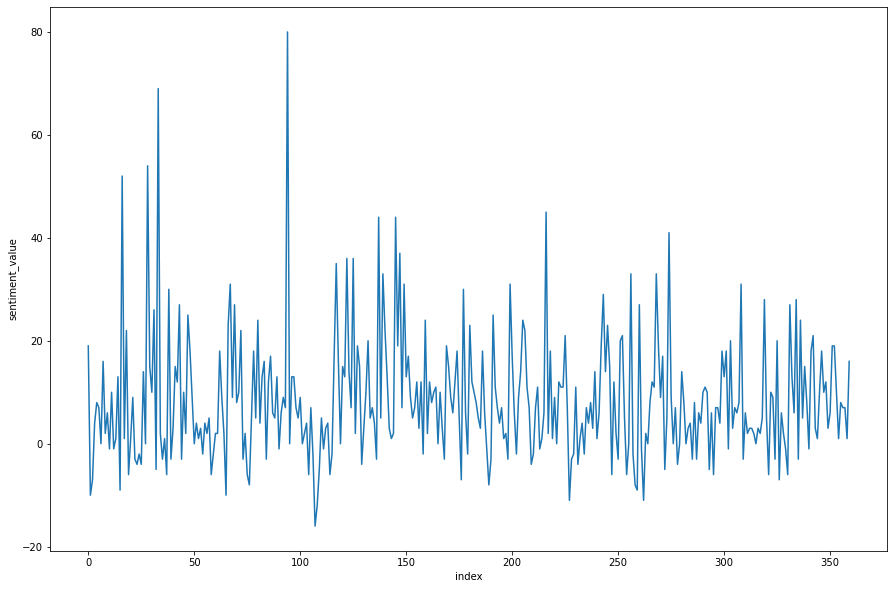

In [78]:
plt.figure(figsize=(15,10))
sns.lineplot(y='sentiment_value',x='index',data = data1)

I have imported requried libraries. Then loaded dataset which i have extracted reviews from amazon. Later i have removed empty strings and some unnecessary spaces. Then i want to find emotion for all review, so i haven't done tokenization. Then created new dataframe with sentences. After i have load affin dataset for getting sentiment values for words. Then i have created manual def function for calculating sentiment values with nlp and lemmatization. Then i have apply function on my data then i got sentiment value. Then i have inserted sentiment values in dataset. Finally i have plotted lineplot for sentiment values.